# Weather Data Exploration
#### Fire Atlas Dataset + NCDC GSOM Data
Andrew McDonald // CSE 847 // April 2021

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
cmap = plt.get_cmap("tab10")

In [2]:
ignitions = gpd.read_file("2016_wildfires/usa_2016_ignitions_weather.shp")
with pd.option_context('display.max_columns', None):  # more options can be specified also
    display(ignitions)

,fire_ID,latitude_x,longitude_,size,perimeter,start_date,start_DOY,end_date,end_DOY,duration,expansion,fire_line,speed,direction,direction_,landcover,landcover_,tile_ID,pop_est,continent,name_x,iso_a3,gdp_md_est,nearest_st,elevation,mindate,maxdate,latitude_y,name_y,datacovera,id,elevationU,longitud_1,distance_f,month,date,station,DP01,DP10,DP1X,DYXP,EMXP,PRCP,CDSD,CLDD,DT00,DT32,DX32,DX70,DX90,DYNT,DYXT,EMNT,EMXT,HDSD,HTDD,TAVG,TMAX,TMIN,DSNW,DYSN,EMSN,SNOW,DSND,DYSD,EMSD,DYFG,AWND,WDF2,WDF5,WSF2,WSF5,DYHF,DYTS,EVAP,MNPN,MXPN,WDMV,HN01,HX01,LN01,LX01,MN01,MX01,WDFG,WSFG,HN02,HN03,HX02,HX03,LN02,LN03,LX02,LX03,MN02,MN03,MX02,MX03,geometry
0,4,20.6271,-156.2470,18.65,30.56,2016-02-16,47,2016-02-20,51,5,3.73,6.20,2.68,8,northwest,7,Open shrublands,h03v06,326625791,North America,United States of America,USA,18560000.0,32923,1228.3,2013-01-01,2017-03-01,20.684200,"KAUPO GAP HAWAII, HI US",1.0000,GHCND:USR0000HKAU,METERS,-156.151900,0.110925,2,2016-02-01T00:00:00,GHCND:USR0000HKAU,NaN,NaN,NaN,NaN,NaN,NaN,0.4,0.1,0.0,0.0,0.0,15.0,0.0,20160208.0,20160227.0,7.2,23.9,205.7,72.6,15.8,20.7,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-156.24786 20.62712)
1,5,19.8063,-155.8950,7.72,12.96,2016-03-20,80,2016-03-25,85,6,1.29,2.47,1.39,4,southeast,7,Open shrublands,h03v07,326625791,North America,United States of America,USA,18560000.0,32941,709.0,2003-05-01,2021-03-01,19.795000,"PUU WAAWAA HAWAII, HI US",0.9487,GHCND:USR0000HPUW,METERS,-155.845300,0.050968,3,2016-03-01T00:00:00,GHCND:USR0000HPUW,NaN,NaN,NaN,NaN,NaN,NaN,48.9,23.1,0.0,0.0,0.0,31.0,0.0,20160327.0,20160328.0,13.3,27.8,17.1,0.9,19.1,23.7,14.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-155.89512 19.80629)
2,6,42.2438,-121.8750,0.86,5.56,2016-08-09,222,2016-08-09,222,1,0.86,1.85,0.79,0,none,12,Croplands,h08v04,326625791,North America,United States of America,USA,18560000.0,21880,1255.5,2013-11-01,2021-03-01,42.228588,"KLAMATH FALLS 0.5 NNW, OR US",1.0000,GHCND:US1ORKL0016,METERS,-121.774503,0.101642,8,2016-08-01T00:00:00,GHCND:US1ORKL0016,1.0,0.0,0.0,20160806.0,0.3,0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,20160831.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-121.87496 42.24378)
3,7,42.2313,-121.8730,0.64,4.63,2016-08-16,229,2016-08-18,231,3,0.21,0.46,0.49,4,southeast,12,Croplands,h08v04,326625791,North America,United States of America,USA,18560000.0,21880,1255.5,2013-11-01,2021-03-01,42.228588,"KLAMATH FALLS 0.5 NNW, OR US",1.0000,GHCND:US1ORKL0016,METERS,-121.774503,0.098534,8,2016-08-01T00:00:00,GHCND:US1ORKL0016,1.0,0.0,0.0,20160806.0,0.3,0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,20160831.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-121.87333 42.23128)
4,8,41.8938,-122.9790,20.37,40.74,2016-08-28,241,2016-09-12,256,16,1.27,2.66,1.49,8,northwest,1,Evergreen Needleleaf forest,h08v04,326625791,North America,United States of America,USA,18560000.0,32609,1674.3,1991-08-01,2021-03-01,41.775000,"COLLINS BALDY CALIFORNIA, CA US",0.9775,GHCND:USR0000CCOL,METERS,-122.950300,0.122218,8,2016-08-01T00:00:00,GHCND:USR0000CCOL,NaN,NaN,NaN,NaN,NaN,NaN,235.5,119.7,0.0,0.0,0.0,31.0,3.0,20160809.0,20160819.0,8.3,35.0,54.3,10.8,21.9,27.5,16.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-122.97924 41.89378)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [3]:
ignitions.columns

Index(['fire_ID', 'latitude_x', 'longitude_', 'size', 'perimeter',
       'start_date', 'start_DOY', 'end_date', 'end_DOY', 'duration',
       'expansion', 'fire_line', 'speed', 'direction', 'direction_',
       'landcover', 'landcover_', 'tile_ID', 'pop_est', 'continent', 'name_x',
       'iso_a3', 'gdp_md_est', 'nearest_st', 'elevation', 'mindate', 'maxdate',
       'latitude_y', 'name_y', 'datacovera', 'id', 'elevationU', 'longitud_1',
       'distance_f', 'month', 'date', 'station', 'DP01', 'DP10', 'DP1X',
       'DYXP', 'EMXP', 'PRCP', 'CDSD', 'CLDD', 'DT00', 'DT32', 'DX32', 'DX70',
       'DX90', 'DYNT', 'DYXT', 'EMNT', 'EMXT', 'HDSD', 'HTDD', 'TAVG', 'TMAX',
       'TMIN', 'DSNW', 'DYSN', 'EMSN', 'SNOW', 'DSND', 'DYSD', 'EMSD', 'DYFG',
       'AWND', 'WDF2', 'WDF5', 'WSF2', 'WSF5', 'DYHF', 'DYTS', 'EVAP', 'MNPN',
       'MXPN', 'WDMV', 'HN01', 'HX01', 'LN01', 'LX01', 'MN01', 'MX01', 'WDFG',
       'WSFG', 'HN02', 'HN03', 'HX02', 'HX03', 'LN02', 'LN03', 'LX02', 'LX03',
       'MN

In [4]:
data_types = pd.read_csv("2016_wildfires/weather_data_types.csv")[["name", "id"]].set_index("id")
with pd.option_context('display.max_rows', None):  # more options can be specified also
    display(data_types)

,name
id,
AWND,Average wind speed
CDSD,Cooling Degree Days Season to Date
CLDD,Cooling Degree Days
DP01,Number of days with greater than or equal to 0...
DP10,Number of days with greater than or equal to 1...
DSND,Number days with snow depth > 1 inch(25.4mm) f...
DSNW,Number days with snow depth > 1 inch.
DT00,Number days with minimum temperature less than...
DT32,Number days with minimum temperature less than...


In [5]:
summary = ignitions.describe()
summary

,fire_ID,latitude_x,longitude_,size,perimeter,start_DOY,end_DOY,duration,expansion,fire_line,...,HX02,HX03,LN02,LN03,LX02,LX03,MN02,MN03,MX02,MX03
count,9195.000000,9195.000000,9195.000000,9195.000000,9195.000000,9195.000000,9195.000000,9195.000000,9195.000000,9195.000000,...,58.000000,1.0,58.000000,1.0,58.000000,1.0,58.000000,1.0,58.000000,1.0
mean,20321.392170,37.919718,-99.515904,2.710430,6.942712,182.974225,186.420228,4.446003,0.474375,0.884557,...,31.744828,26.1,18.120690,12.8,21.962069,15.6,22.043103,18.1,25.679310,21.3
std,9945.825061,8.552860,16.778850,17.632852,11.841560,90.782283,90.769489,4.959549,1.449164,1.386264,...,3.196169,NaN,3.915859,NaN,4.402704,NaN,4.224827,NaN,4.140377,NaN
min,4.000000,19.806300,-164.909000,0.210000,1.850000,1.000000,1.000000,1.000000,0.040000,0.080000,...,14.400000,26.1,0.600000,12.8,1.100000,15.6,2.100000,18.1,6.000000,21.3
25%,8587.500000,32.860400,-107.452000,0.210000,1.850000,93.000000,96.000000,1.000000,0.210000,0.460000,...,31.700000,26.1,18.300000,12.8,21.100000,15.6,21.500000,18.1,24.200000,21.3
50%,22027.000000,35.985400,-95.542100,0.640000,3.700000,198.000000,202.000000,2.000000,0.210000,0.460000,...,31.700000,26.1,18.300000,12.8,21.100000,15.6,21.500000,18.1,24.200000,21.3
75%,24846.000000,40.960400,-90.171100,1.710000,7.410000,265.000000,270.000000,6.000000,0.430000,0.930000,...,33.900000,26.1,21.100000,12.8,26.100000,15.6,25.900000,18.1,30.000000,21.3
max,97710.000000,69.352100,-72.891100,1300.150000,483.370000,335.000000,346.000000,40.000000,86.680000,48.770000,...,33.900000,26.1,21.100000,12.8,26.100000,15.6,25.900000,18.1,30.000000,21.3


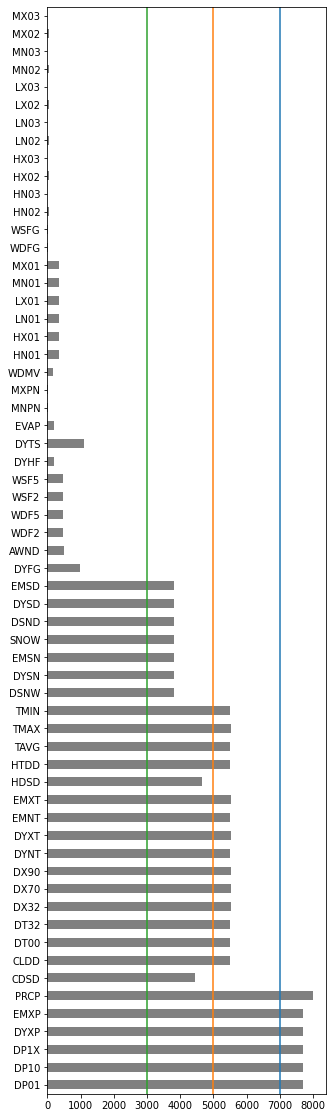

In [6]:
weather_summary = summary[['DP01', 'DP10', 'DP1X',
        'DYXP', 'EMXP', 'PRCP', 'CDSD', 'CLDD', 'DT00', 'DT32', 'DX32', 'DX70',
       'DX90', 'DYNT', 'DYXT', 'EMNT', 'EMXT', 'HDSD', 'HTDD', 'TAVG', 'TMAX',
       'TMIN', 'DSNW', 'DYSN', 'EMSN', 'SNOW', 'DSND', 'DYSD', 'EMSD', 'DYFG',
       'AWND', 'WDF2', 'WDF5', 'WSF2', 'WSF5', 'DYHF', 'DYTS', 'EVAP', 'MNPN',
       'MXPN', 'WDMV', 'HN01', 'HX01', 'LN01', 'LX01', 'MN01', 'MX01', 'WDFG',
       'WSFG', 'HN02', 'HN03', 'HX02', 'HX03', 'LN02', 'LN03', 'LX02', 'LX03',
       'MN02', 'MN03', 'MX02', 'MX03']]
fig, ax = plt.subplots(figsize=(5, 20))
weather_summary.loc["count"].plot(ax=ax, kind="barh", color="grey")
plt.axvline(x=7000, color=cmap(0))
plt.axvline(x=5000, color=cmap(1))
plt.axvline(x=3000, color=cmap(2))

In [7]:
high_n_features = weather_summary.loc[:, weather_summary.loc["count"] > 7000]
high_n_features

,DP01,DP10,DP1X,DYXP,EMXP,PRCP
count,7683.000000,7683.000000,7683.000000,7.683000e+03,7683.000000,7997.000000
mean,5.948978,4.025641,0.655864,2.014769e+07,26.844201,65.377041
std,4.210054,3.278530,1.100644,5.090341e+05,27.796709,73.539464
min,0.000000,0.000000,0.000000,2.016030e+05,0.000000,0.000000
25%,3.000000,2.000000,0.000000,2.016041e+07,8.100000,16.500000
50%,5.000000,3.000000,0.000000,2.016072e+07,17.800000,41.600000
75%,8.000000,5.000000,1.000000,2.016092e+07,37.800000,96.300000
max,30.000000,26.000000,12.000000,2.016113e+07,372.100000,737.600000


In [8]:
med_n_features = weather_summary.loc[:, weather_summary.loc["count"] > 5000]
med_n_features

,DP01,DP10,DP1X,DYXP,EMXP,PRCP,CLDD,DT00,DT32,DX32,DX70,DX90,DYNT,DYXT,EMNT,EMXT,HTDD,TAVG,TMAX,TMIN
count,7683.000000,7683.000000,7683.000000,7.683000e+03,7683.000000,7997.000000,5495.000000,5508.000000,5508.000000,5536.000000,5536.000000,5536.000000,5.508000e+03,5.536000e+03,5508.000000,5536.000000,5495.000000,5499.000000,5536.000000,5508.000000
mean,5.948978,4.025641,0.655864,2.014769e+07,26.844201,65.377041,72.091847,0.002723,2.781046,0.111994,19.989523,4.663295,2.016070e+07,2.016070e+07,3.340105,30.201445,109.488899,17.078960,23.816420,10.366975
std,4.210054,3.278530,1.100644,5.090341e+05,27.796709,73.539464,93.400257,0.069967,5.803544,0.722657,10.440639,8.038844,2.891970e+02,2.824220e+02,7.243940,5.382398,121.380049,6.468791,6.730139,6.603245
min,0.000000,0.000000,0.000000,2.016030e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.016010e+07,2.016010e+07,-28.300000,10.600000,0.000000,-4.800000,-0.100000,-9.400000
25%,3.000000,2.000000,0.000000,2.016041e+07,8.100000,16.500000,0.900000,0.000000,0.000000,0.000000,12.000000,0.000000,2.016042e+07,2.016043e+07,-1.300000,26.700000,5.800000,12.500000,19.400000,5.600000
50%,5.000000,3.000000,0.000000,2.016072e+07,17.800000,41.600000,23.900000,0.000000,0.000000,0.000000,23.000000,0.000000,2.016073e+07,2.016073e+07,2.800000,31.100000,69.600000,16.700000,24.000000,9.800000
75%,8.000000,5.000000,1.000000,2.016092e+07,37.800000,96.300000,113.200000,0.000000,2.000000,0.000000,30.000000,5.000000,2.016093e+07,2.016093e+07,7.800000,33.900000,176.900000,21.700000,29.300000,14.600000
max,30.000000,26.000000,12.000000,2.016113e+07,372.100000,737.600000,520.500000,2.000000,31.000000,13.000000,31.000000,31.000000,2.016113e+07,2.016113e+07,25.000000,50.000000,669.600000,35.100000,43.000000,27.800000


In [9]:
low_n_features = weather_summary.loc[:, weather_summary.loc["count"] > 3000]
low_n_features

,DP01,DP10,DP1X,DYXP,EMXP,PRCP,CDSD,CLDD,DT00,DT32,...,TAVG,TMAX,TMIN,DSNW,DYSN,EMSN,SNOW,DSND,DYSD,EMSD
count,7683.000000,7683.000000,7683.000000,7.683000e+03,7683.000000,7997.000000,4432.000000,5495.000000,5508.000000,5508.000000,...,5499.000000,5536.000000,5508.000000,3808.000000,3.808000e+03,3808.000000,3808.000000,3825.000000,3.825000e+03,3825.000000
mean,5.948978,4.025641,0.655864,2.014769e+07,26.844201,65.377041,411.218457,72.091847,0.002723,2.781046,...,17.078960,23.816420,10.366975,0.093225,2.016076e+07,4.820903,6.586660,1.062222,2.016075e+07,59.857778
std,4.210054,3.278530,1.100644,5.090341e+05,27.796709,73.539464,563.029322,93.400257,0.069967,5.803544,...,6.468791,6.730139,6.603245,0.443825,2.923707e+02,22.149632,31.969324,4.200306,2.665268e+02,257.038516
min,0.000000,0.000000,0.000000,2.016030e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-4.800000,-0.100000,-9.400000,0.000000,2.016011e+07,0.000000,0.000000,0.000000,2.016010e+07,0.000000
25%,3.000000,2.000000,0.000000,2.016041e+07,8.100000,16.500000,2.975000,0.900000,0.000000,0.000000,...,12.500000,19.400000,5.600000,0.000000,2.016043e+07,0.000000,0.000000,0.000000,2.016053e+07,0.000000
50%,5.000000,3.000000,0.000000,2.016072e+07,17.800000,41.600000,70.100000,23.900000,0.000000,0.000000,...,16.700000,24.000000,9.800000,0.000000,2.016093e+07,0.000000,0.000000,0.000000,2.016083e+07,0.000000
75%,8.000000,5.000000,1.000000,2.016092e+07,37.800000,96.300000,880.200000,113.200000,0.000000,2.000000,...,21.700000,29.300000,14.600000,0.000000,2.016103e+07,0.000000,0.000000,0.000000,2.016093e+07,0.000000
max,30.000000,26.000000,12.000000,2.016113e+07,372.100000,737.600000,3022.500000,520.500000,2.000000,31.000000,...,35.100000,43.000000,27.800000,10.000000,2.016113e+07,508.000000,659.000000,31.000000,2.016113e+07,2972.000000


In [10]:
base_features = ['fire_ID', 'latitude_x', 'longitude_', 'size', 'perimeter',
       'start_date', 'start_DOY', 'end_date', 'end_DOY', 'duration',
       'expansion', 'fire_line', 'speed', 'direction', 'direction_',
       'landcover', 'landcover_', 'tile_ID', 'pop_est', 'continent', 'name_x',
       'iso_a3', 'gdp_md_est', 'nearest_st', 'elevation', 'mindate', 'maxdate',
       'latitude_y', 'name_y', 'datacovera', 'id', 'elevationU', 'longitud_1',
       'distance_f', 'month', 'date', 'station', 'geometry']
high_n_data = ignitions[base_features + list(high_n_features.columns)]
med_n_data = ignitions[base_features + list(med_n_features.columns)]
low_n_data = ignitions[base_features + list(low_n_features.columns)]

In [11]:
high_n_data.to_file("data/high_n_low_d.shp", index=False)
med_n_data.to_file("data/med_n_med_d.shp", index=False)
low_n_data.to_file("data/low_n_high_d.shp", index=False)
